In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.ticker as mtick
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


from sklearn import metrics

import warnings

In [13]:
cv=pd.read_csv('/content/Jobs_NYC_Postings.csv')

In [14]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [15]:
cv.describe()

,Job ID,# Of Positions,Salary Range From,Salary Range To,Recruitment Contact
count,5120.000000,5120.000000,5120.000000,5120.000000,0.0
mean,598721.366211,2.070898,64625.224123,89978.575734,NaN
std,28274.636161,5.799227,31378.516179,46732.299939,NaN
min,469953.000000,1.000000,0.000000,15.000000,NaN
25%,586358.000000,1.000000,51869.000000,64608.000000,NaN
50%,607060.000000,1.000000,62397.000000,85147.000000,NaN
75%,621404.000000,1.000000,80557.000000,113550.000000,NaN
max,628806.000000,150.000000,225000.000000,252165.000000,NaN


In [16]:
cv.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [17]:
cv.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date

In [18]:
cv.duplicated().sum()

19

In [19]:
cv.drop_duplicates(inplace=True)

In [20]:
cv.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


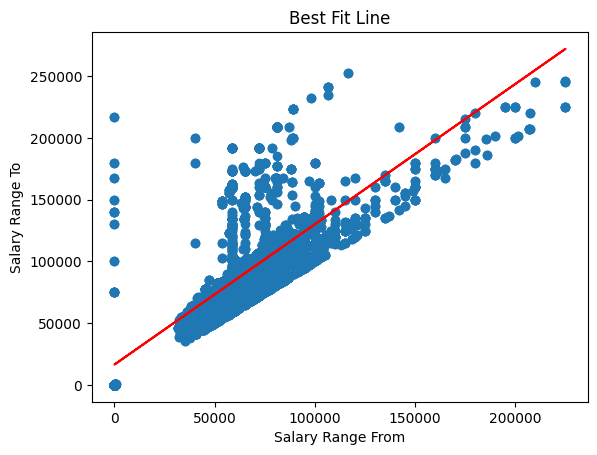

In [21]:


import matplotlib.pyplot as plt
import numpy as np

x = np.array(cv['Salary Range From'])
y = np.array(cv['Salary Range To'])


m, b = np.polyfit(x, y, 1)


plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.xlabel('Salary Range From')
plt.ylabel('Salary Range To')
plt.title('Best Fit Line')
plt.show()


In [22]:
cv = cv.drop(['Recruitment Contact', 'Work Location 1', '# Of Positions', 'Title Code No', 'Additional Information', 'To Apply', 'Posting Date', 'Post Until', 'Posting Updated', 'Process Date'], axis=1, errors='ignore')

cv['Full-Time/Part-Time indicator'].fillna('Unknown', inplace=True)
cv['Minimum Qual Requirements'].fillna('Not Specified', inplace=True)
cv['Preferred Skills'].fillna('Not Specified', inplace=True)
cv['Hours/Shift'].fillna('Not Specified', inplace=True)

cv = cv.dropna()

In [23]:
cv = cv.drop(['Residency Requirement'], axis=1)

In [24]:
cv.head()

,Job ID,Agency,Posting Type,Business Title,Civil Service Title,Title Classification,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Hours/Shift
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,02,Constituent Services & Community Programs Heal...,F,Experienced (non-manager),82506.0,94882.0,Annual,42-09 28th Street,"Maternal, Infant, & Repr. Hlth","Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",Experience in quantitative research methods an...,Not Specified
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,00,"Policy, Research & Analysis Public Safety, Ins...",F,Experienced (non-manager),58682.0,134570.0,Annual,30-30 Thomson Ave L I City Qns,Pub Bldgs/Transportation,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates must have excellent management skil...,35 Hours
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,00,"Engineering, Architecture, & Planning",F,Experienced (non-manager),58682.0,91405.0,Annual,30-30 Thomson Ave L I City Qns,PUB BLDGS/CPD/Library/Brooklyn,Hours: Full-Time â 35 Hours Work Location: 3...,1. A baccalaureate degree from an accredited c...,Candidates should have at least six years of e...,Not Specified
3,580593,DEPARTMENT OF TRANSPORTATION,External,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,02,"Finance, Accounting, & Procurement",F,Experienced (non-manager),50972.0,82730.0,Annual,55 Water St Ny Ny,Bridge Repair/352 Kent St,Reporting directly to the Director of Bridge R...,1. A baccalaureate degree from an accredited c...,Familiar with and knowledge of Procurement sys...,9:00am â 5:00pm
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,03,Constituent Services & Community Programs Heal...,F,Experienced (non-manager),92301.0,106146.0,Annual,42-09 28th Street,Dis-Div. Mgmt. & Sys Coord,"Established in 1805, the New York City Departm...","1. For Assignment Level I (only physical, bio...",At least five yearsâ work experience in the ...,Not Specified


In [25]:
non_numeric_columns = cv.select_dtypes(include=['object']).columns


label_encoder = LabelEncoder()
for column in non_numeric_columns:
    cv[column] = label_encoder.fit_transform(cv[column].astype(str))


In [26]:
cv.head()

,Job ID,Agency,Posting Type,Business Title,Civil Service Title,Title Classification,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Hours/Shift
0,623668,22,0,1431,136,3,2,105,0,2,82506.0,94882.0,0,132,490,502,46,505,277
1,608193,20,1,657,36,0,0,167,0,2,58682.0,134570.0,0,110,709,817,99,320,32
2,625094,20,1,1592,36,0,0,123,0,2,58682.0,91405.0,0,110,653,816,99,349,277
3,580593,18,0,1288,282,0,2,135,0,2,50972.0,82730.0,0,151,83,1266,86,541,150
4,624937,22,0,681,136,3,3,105,0,2,92301.0,106146.0,0,132,219,599,46,269,277


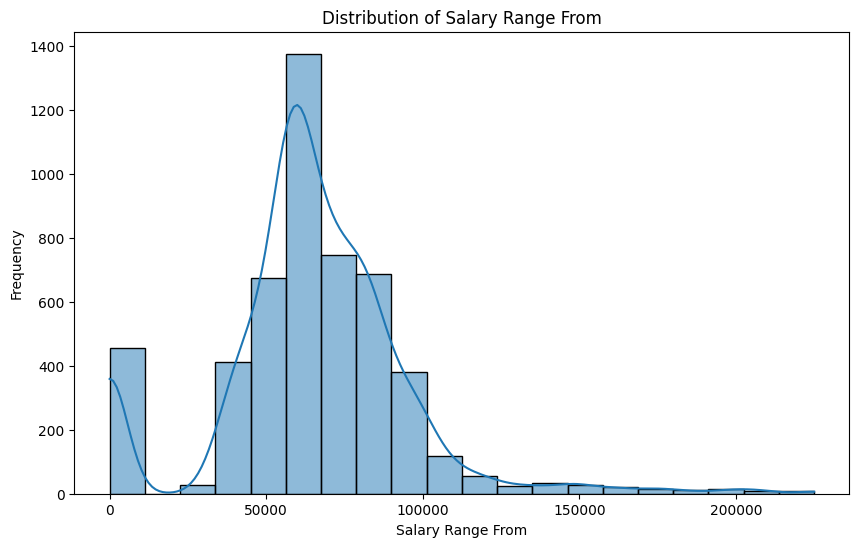

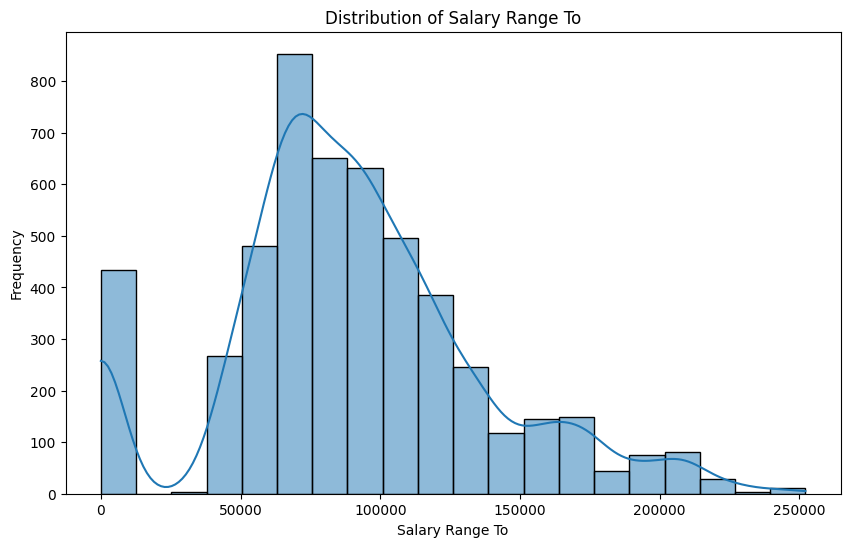

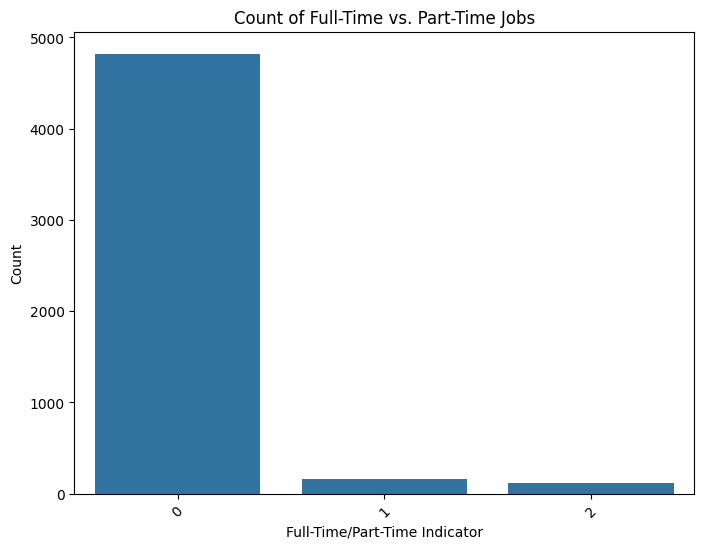

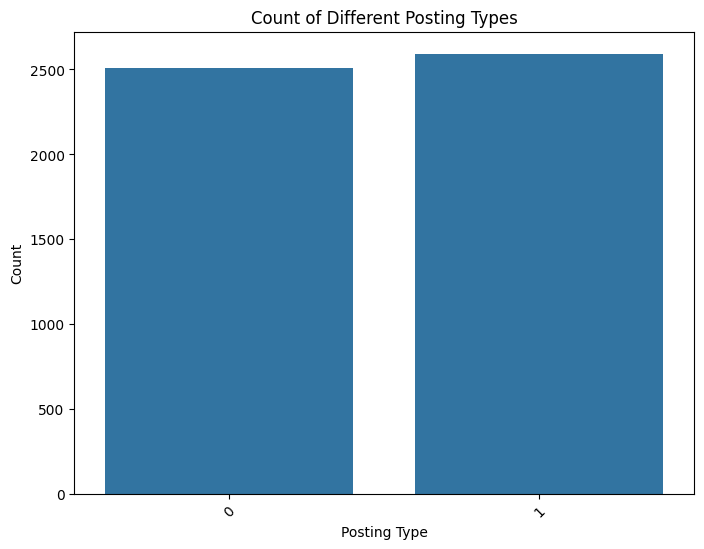

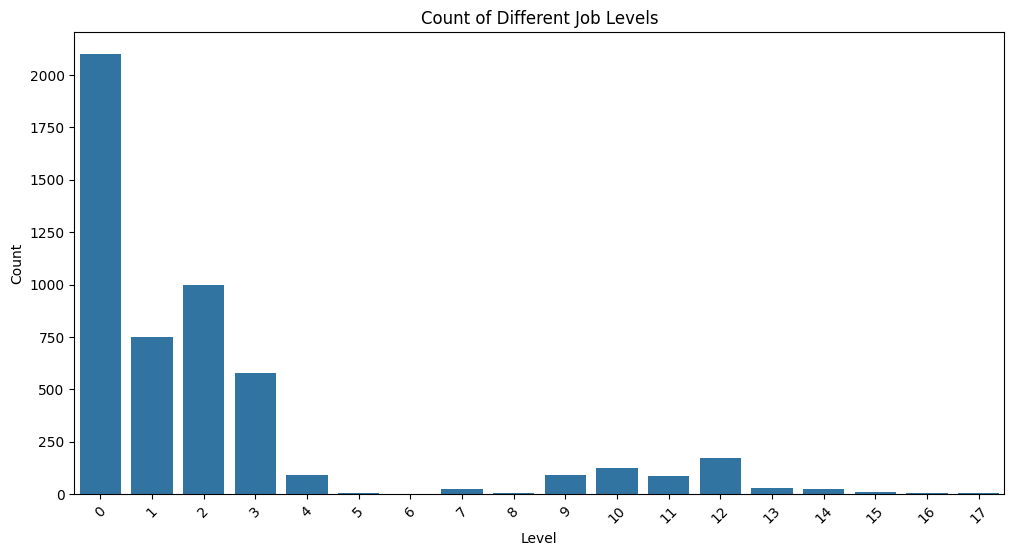

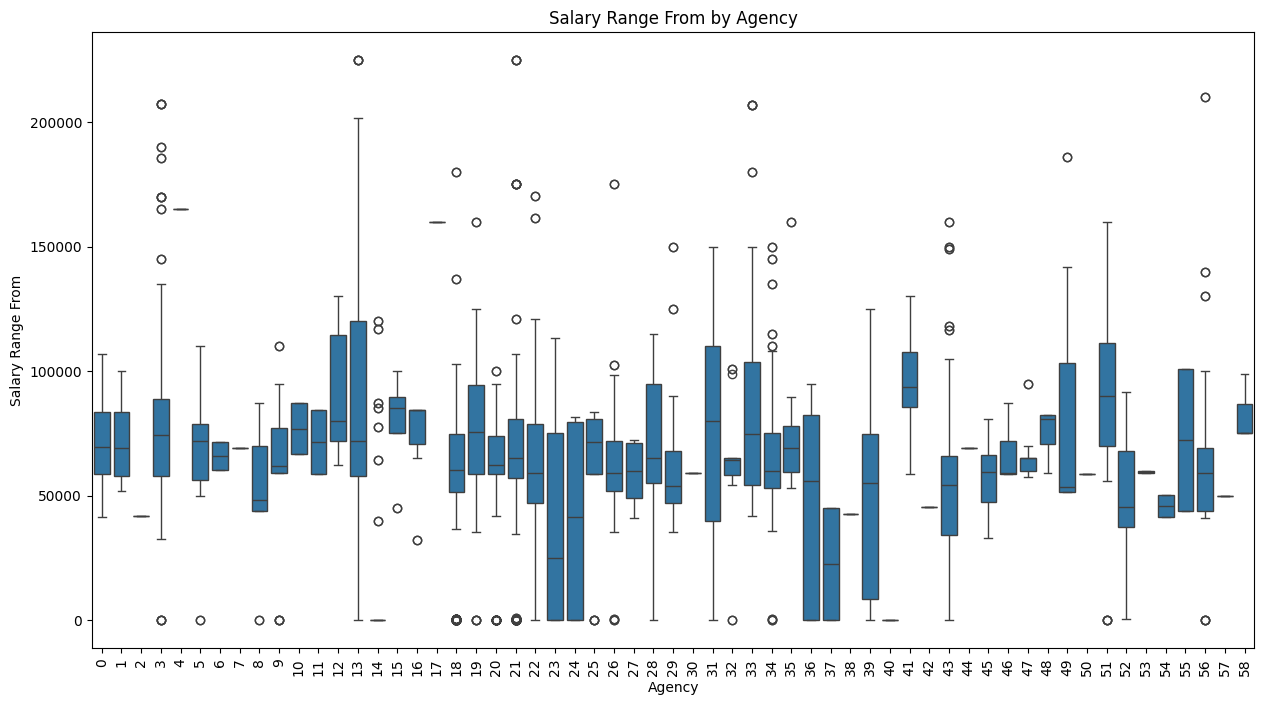

In [27]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(cv['Salary Range From'], kde=True, bins=20)
plt.xlabel('Salary Range From')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Range From')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(cv['Salary Range To'], kde=True, bins=20)
plt.xlabel('Salary Range To')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Range To')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Full-Time/Part-Time indicator', data=cv)
plt.xlabel('Full-Time/Part-Time Indicator')
plt.ylabel('Count')
plt.title('Count of Full-Time vs. Part-Time Jobs')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='Posting Type', data=cv)
plt.xlabel('Posting Type')
plt.ylabel('Count')
plt.title('Count of Different Posting Types')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='Level', data=cv)
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Different Job Levels')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(15, 8))
sns.boxplot(x='Agency', y='Salary Range From', data=cv)
plt.xlabel('Agency')
plt.ylabel('Salary Range From')
plt.title('Salary Range From by Agency')
plt.xticks(rotation=90)
plt.show()


In [28]:
x = cv.drop(['Salary Range From','Salary Range To'],axis=1)
y1 = cv['Salary Range From']
y2 = cv['Salary Range To']

In [29]:

x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)

x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)


In [30]:

from sklearn.linear_model import LinearRegression


lr_y1 = LinearRegression()
lr_y2 = LinearRegression()

lr_y1.fit(x_train, y1_train)
lr_y2.fit(x_train, y2_train)

y1_train_pred_lr = lr_y1.predict(x_train)
y1_test_pred_lr = lr_y1.predict(x_test)

y2_train_pred_lr = lr_y2.predict(x_train)
y2_test_pred_lr = lr_y2.predict(x_test)


train_r2_y1_lr = r2_score(y1_train, y1_train_pred_lr)
test_r2_y1_lr = r2_score(y1_test, y1_test_pred_lr)

train_r2_y2_lr = r2_score(y2_train, y2_train_pred_lr)
test_r2_y2_lr = r2_score(y2_test, y2_test_pred_lr)


print("\nLinear Regression Results:")
print("For Salary Range From:")
print("Training R-squared:", train_r2_y1_lr)
print("Testing R-squared:", test_r2_y1_lr)

print("\nFor Salary Range To:")
print("Training R-squared:", train_r2_y2_lr)
print("Testing R-squared:", test_r2_y2_lr)



Linear Regression Results:
For Salary Range From:
Training R-squared: 0.5570405455444283
Testing R-squared: 0.5449881816739741

For Salary Range To:
Training R-squared: 0.6463223653021859
Testing R-squared: 0.6525452493636901


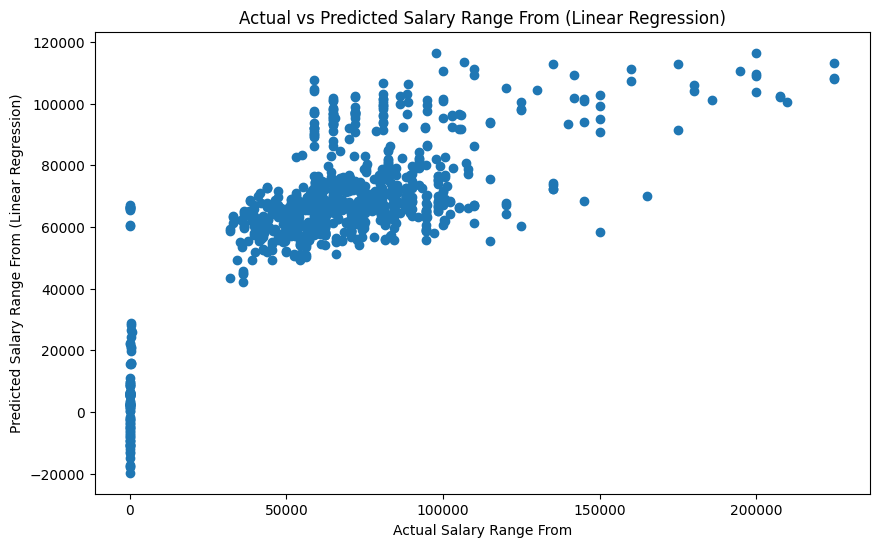

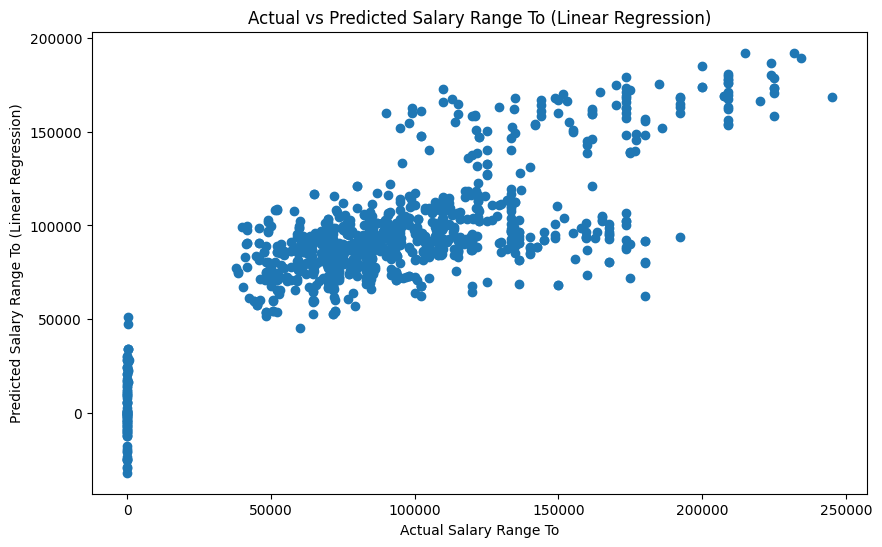

In [31]:


import matplotlib.pyplot as plt
# For Salary Range From
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_test_pred_lr)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From (Linear Regression)')
plt.title('Actual vs Predicted Salary Range From (Linear Regression)')
plt.show()

# For Salary Range To
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_test_pred_lr)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To (Linear Regression)')
plt.title('Actual vs Predicted Salary Range To (Linear Regression)')
plt.show()



In [32]:

from sklearn.ensemble import RandomForestRegressor


rf_y1 = RandomForestRegressor(random_state=42)
rf_y2 = RandomForestRegressor(random_state=42)


rf_y1.fit(x_train, y1_train)
rf_y2.fit(x_train, y2_train)


y1_train_pred_rf = rf_y1.predict(x_train)
y1_test_pred_rf = rf_y1.predict(x_test)

y2_train_pred_rf = rf_y2.predict(x_train)
y2_test_pred_rf = rf_y2.predict(x_test)


train_r2_y1_rf = r2_score(y1_train, y1_train_pred_rf)
test_r2_y1_rf = r2_score(y1_test, y1_test_pred_rf)

train_r2_y2_rf = r2_score(y2_train, y2_train_pred_rf)
test_r2_y2_rf = r2_score(y2_test, y2_test_pred_rf)

print("\nRandom Forest Regression Results:")
print("For Salary Range From:")
print("Training R-squared:", train_r2_y1_rf)
print("Testing R-squared:", test_r2_y1_rf)

print("\nFor Salary Range To:")
print("Training R-squared:", train_r2_y2_rf)
print("Testing R-squared:", test_r2_y2_rf)




Random Forest Regression Results:
For Salary Range From:
Training R-squared: 0.9918642349376549
Testing R-squared: 0.8897284155900693

For Salary Range To:
Training R-squared: 0.9947121144834551
Testing R-squared: 0.9605214351507221


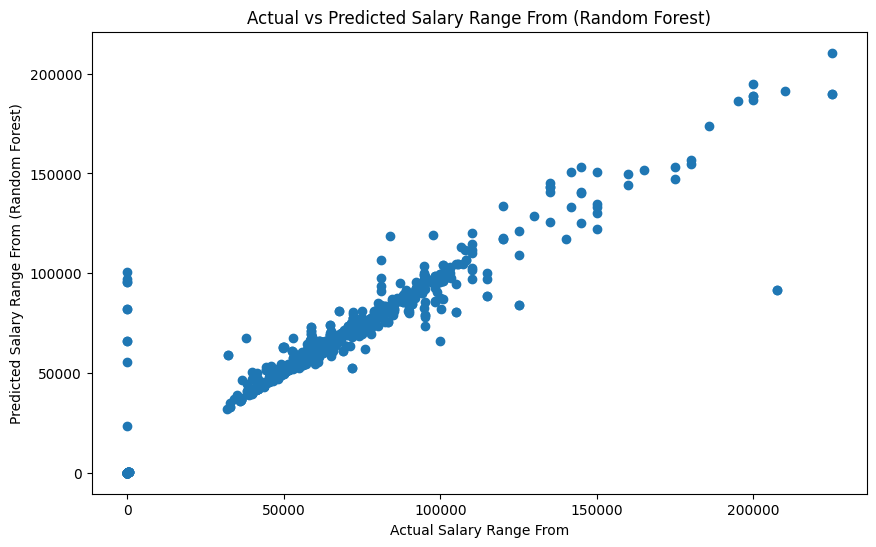

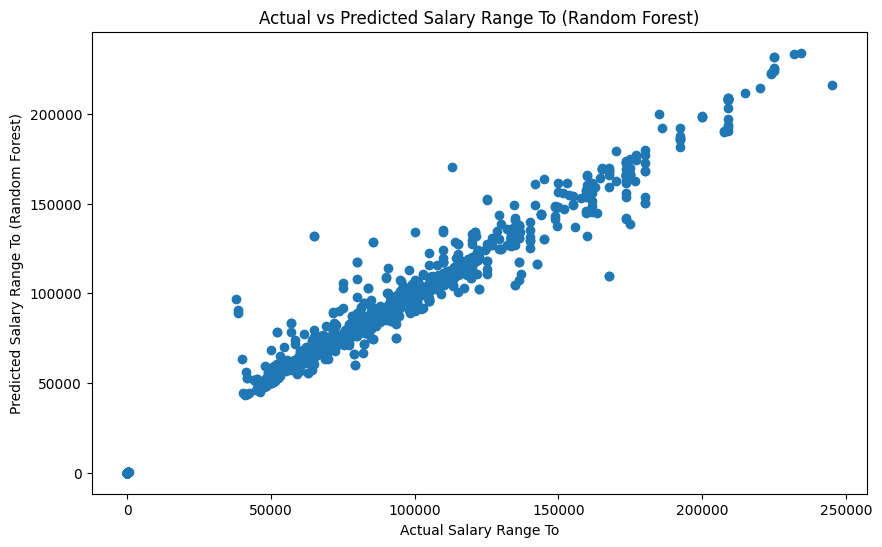

In [33]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_test_pred_rf)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From (Random Forest)')
plt.title('Actual vs Predicted Salary Range From (Random Forest)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_test_pred_rf)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To (Random Forest)')
plt.title('Actual vs Predicted Salary Range To (Random Forest)')
plt.show()



In [34]:


xgb_regressor_y1 = xgb.XGBRegressor(objective='reg:squarederror')

xgb_regressor_y1.fit(x_train, y1_train)

y1_train_pred = xgb_regressor_y1.predict(x_train)
y1_test_pred = xgb_regressor_y1.predict(x_test)


train_r2_y1 = r2_score(y1_train, y1_train_pred)
test_r2_y1 = r2_score(y1_test, y1_test_pred)


xgb_regressor_y2 = xgb.XGBRegressor(objective='reg:squarederror')


xgb_regressor_y2.fit(x_train, y2_train)


y2_train_pred = xgb_regressor_y2.predict(x_train)
y2_test_pred = xgb_regressor_y2.predict(x_test)


train_r2_y2 = r2_score(y2_train, y2_train_pred)
test_r2_y2 = r2_score(y2_test, y2_test_pred)


print("\nXGBoost Regression Results:")
print("For Salary Range From:")
print("Training R-squared:", train_r2_y1)
print("Testing R-squared:", test_r2_y1)

print("\nFor Salary Range To:")
print("Training R-squared:", train_r2_y2)
print("Testing R-squared:", test_r2_y2)



XGBoost Regression Results:
For Salary Range From:
Training R-squared: 0.9967405426630587
Testing R-squared: 0.9015433659286012

For Salary Range To:
Training R-squared: 0.9973702308321069
Testing R-squared: 0.9702757627529173


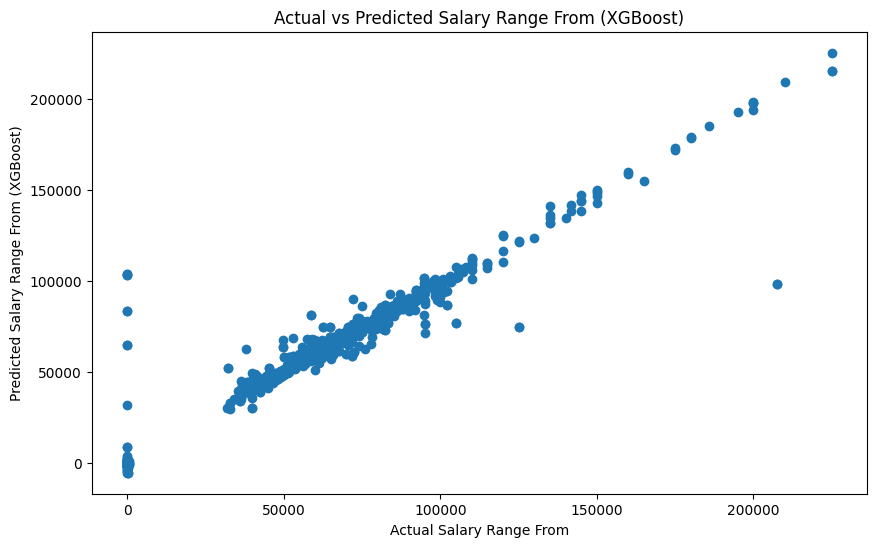

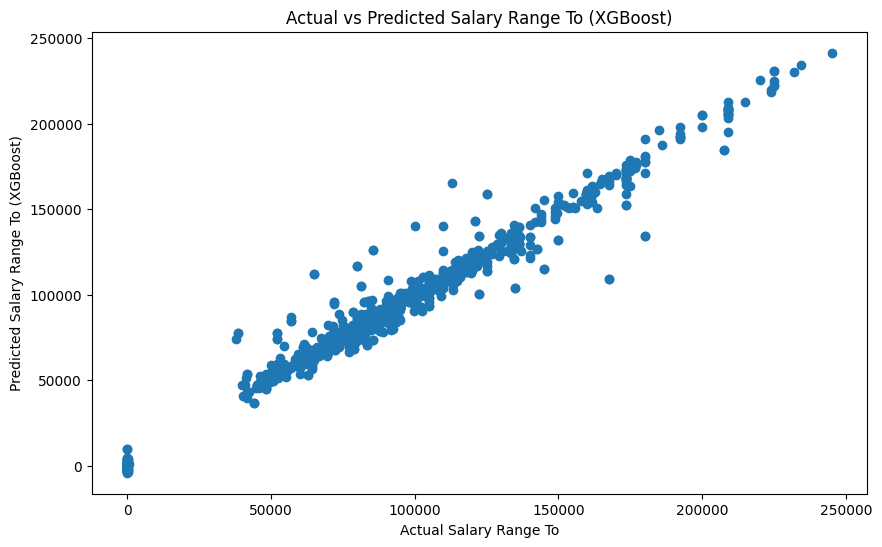

In [35]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_test_pred)
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From (XGBoost)')
plt.title('Actual vs Predicted Salary Range From (XGBoost)')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_test_pred)
plt.xlabel('Actual Salary Range To')
plt.ylabel('Predicted Salary Range To (XGBoost)')
plt.title('Actual vs Predicted Salary Range To (XGBoost)')
plt.show()


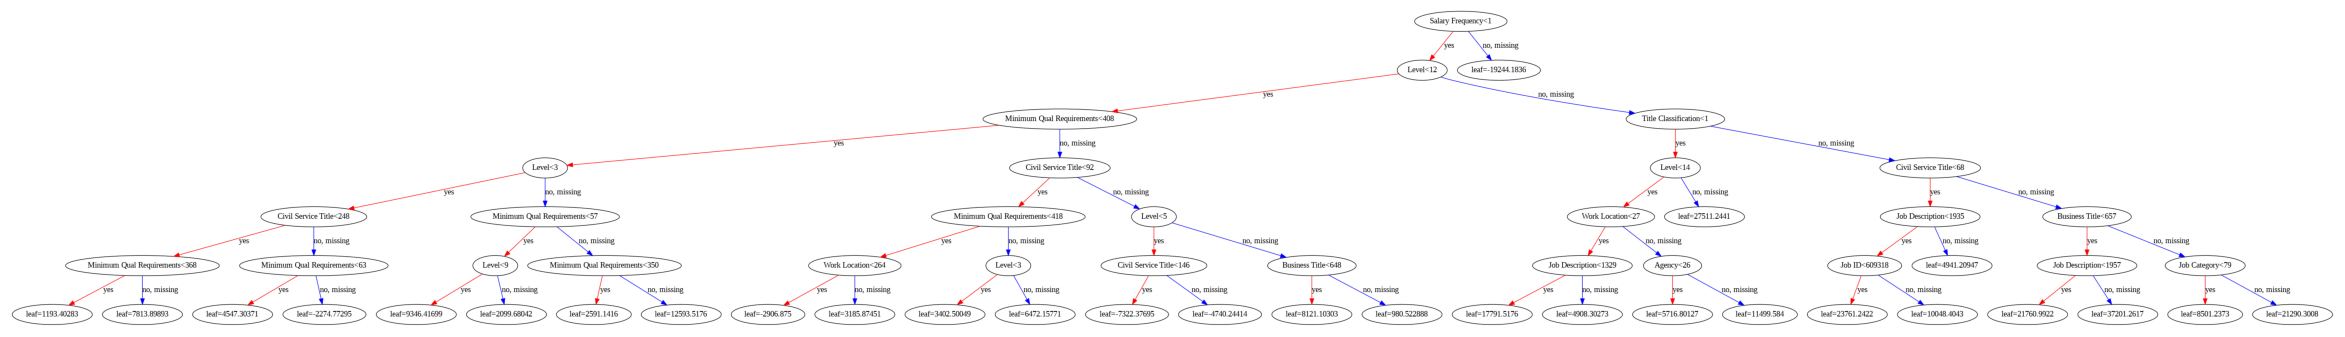

In [36]:


import matplotlib.pyplot as plt
from xgboost import plot_tree


num_trees = 0

fig, ax = plt.subplots(figsize=(30, 30))  # Adjust figure size as needed
plot_tree(xgb_regressor_y1, num_trees=num_trees, ax=ax)
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error


param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

xgb_regressor_y1 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search_y1 = GridSearchCV(estimator=xgb_regressor_y1, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)


grid_search_y1.fit(x_train, y1_train)


best_params_y1 = grid_search_y1.best_params_
best_score_y1 = grid_search_y1.best_score_


print("Best parameters for 'Salary Range From':", best_params_y1)
print("Best CV R-squared for 'Salary Range From':", best_score_y1)


best_xgb_regressor_y1 = grid_search_y1.best_estimator_


y1_train_pred = best_xgb_regressor_y1.predict(x_train)
y1_test_pred = best_xgb_regressor_y1.predict(x_test)


train_r2_y1 = r2_score(y1_train, y1_train_pred)
test_r2_y1 = r2_score(y1_test, y1_test_pred)

print("\nXGBoost Regression Results for grid_search for 'Salary Range From':")
print("Training R-squared:", train_r2_y1)
print("Testing R-squared:", test_r2_y1)


xgb_regressor_y2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search_y2 = GridSearchCV(estimator=xgb_regressor_y2, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_y2.fit(x_train, y2_train)

best_params_y2 = grid_search_y2.best_params_
best_score_y2 = grid_search_y2.best_score_

print("Best parameters for 'Salary Range To':", best_params_y2)
print("Best CV R-squared for 'Salary Range To':", best_score_y2)

best_xgb_regressor_y2 = grid_search_y2.best_estimator_
y2_train_pred = best_xgb_regressor_y2.predict(x_train)
y2_test_pred = best_xgb_regressor_y2.predict(x_test)

train_r2_y2 = r2_score(y2_train, y2_train_pred)
test_r2_y2 = r2_score(y2_test, y2_test_pred)

print("\nXGBoost Regression Results for grid_search for 'Salary Range To':")
print("Training R-squared:", train_r2_y2)
print("Testing R-squared:", test_r2_y2)


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for 'Salary Range From': {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best CV R-squared for 'Salary Range From': 0.8768027253523939

XGBoost Regression Results for grid_search for 'Salary Range From':
Training R-squared: 0.9472585652153497
Testing R-squared: 0.8643796442918207
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters for 'Salary Range To': {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best CV R-squared for 'Salary Range To': 0.9217125943369324

XGBoost Regression Results for grid_search for 'Salary Range To':
Training R-squared: 0.959290322990986
Testing R-squared: 0.9335632902368762


In [46]:


import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\nK-Fold Cross-Validation for 'Salary Range From' (y1):")
cv_scores_y1 = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y1_train, y1_test = y1.iloc[train_index], y1.iloc[test_index]

    xgb_regressor_y1 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_regressor_y1.fit(x_train, y1_train)

    y1_pred = xgb_regressor_y1.predict(x_test)
    r2 = r2_score(y1_test, y1_pred)
    cv_scores_y1.append(r2)
    print("Fold R-squared:", r2)

print("Mean CV R-squared (y1):", np.mean(cv_scores_y1))


print("\nK-Fold Cross-Validation for 'Salary Range To' (y2):")
cv_scores_y2 = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    xgb_regressor_y2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_regressor_y2.fit(x_train, y2_train)

    y2_pred = xgb_regressor_y2.predict(x_test)
    r2 = r2_score(y2_test, y2_pred)
    cv_scores_y2.append(r2)
    print("Fold R-squared:", r2)

print("Mean CV R-squared (y2):", np.mean(cv_scores_y2))



K-Fold Cross-Validation for 'Salary Range From' (y1):
Fold R-squared: 0.9022952763338183
Fold R-squared: 0.9464628482437981
Fold R-squared: 0.9449792893581659
Fold R-squared: 0.9659524034720165
Fold R-squared: 0.9792963642200745
Mean CV R-squared (y1): 0.9477972363255747

K-Fold Cross-Validation for 'Salary Range To' (y2):
Fold R-squared: 0.9692141959691086
Fold R-squared: 0.9738480234255403
Fold R-squared: 0.9823927013832797
Fold R-squared: 0.9767538888155282
Fold R-squared: 0.982033954455278
Mean CV R-squared (y2): 0.976848552809747


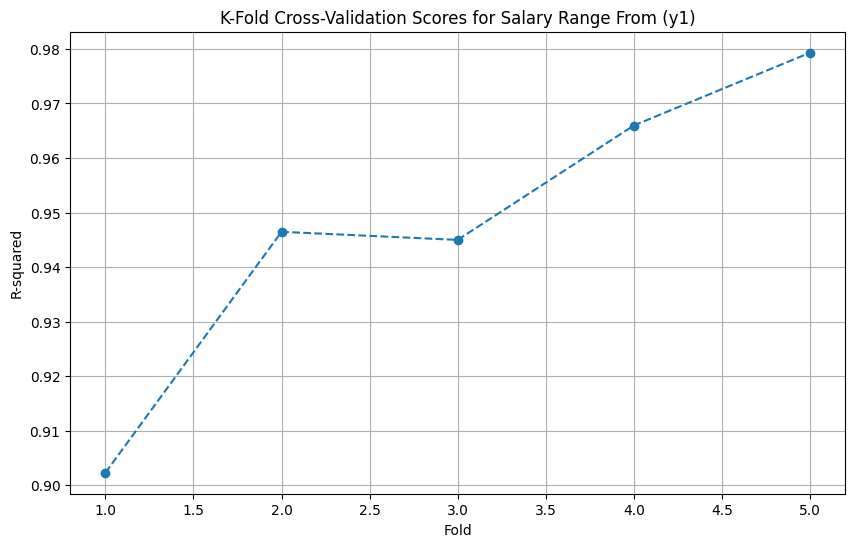

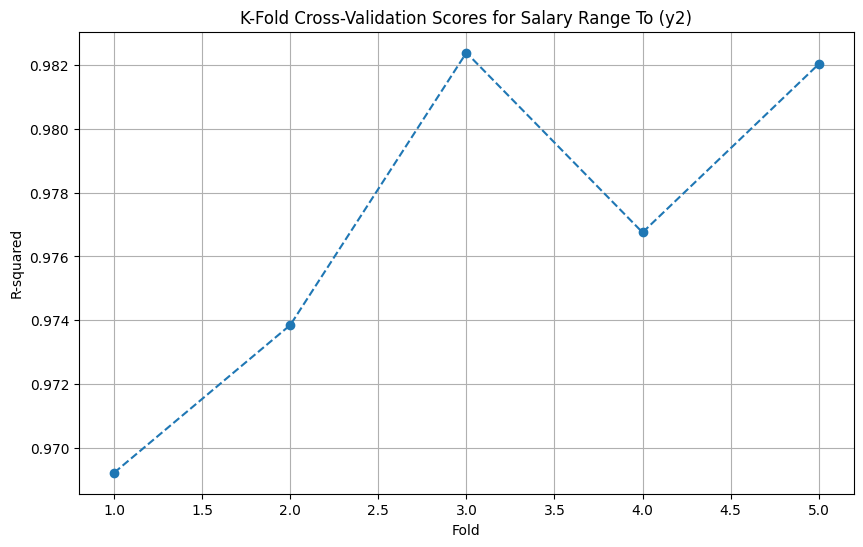

In [48]:


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_y1, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('K-Fold Cross-Validation Scores for Salary Range From (y1)')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores_y2, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('K-Fold Cross-Validation Scores for Salary Range To (y2)')
plt.grid(True)
plt.show()
